In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [8]:
path = '/Users/kilometers/Documents/GitHub/CS534/hw7/dataset/'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 630 images belonging to 1 classes.


In [9]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [10]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape) 
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 1)
Image Size of first image :  (227, 227, 3)
Output of first image :  (1,)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1.]')

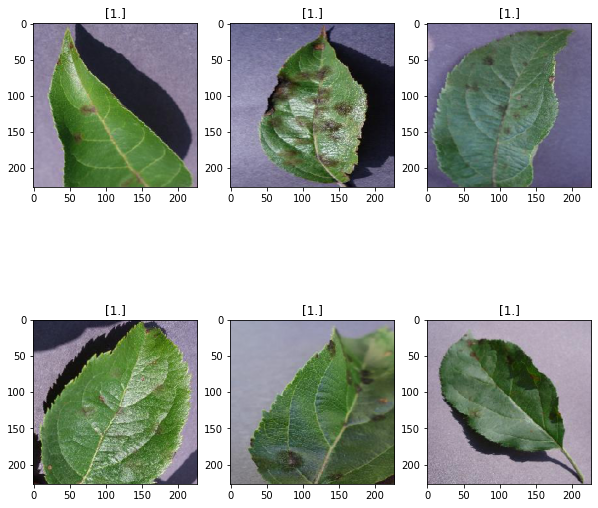

In [11]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])

axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])

axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])

axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])

axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])

axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [12]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(6,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')

    
    return model

In [13]:
alex = AlexNet(train[0][0].shape[1:])

alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [14]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

alex.fit_generator(train, epochs=50)

<ipython-input-14-64d1c0a13e03>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  alex.fit_generator(train, epochs=50)


Epoch 1/50
20/20 [==============================] - 30s 1s/step - loss: 9991.2188 - accuracy: 0.1952
Epoch 2/50
20/20 [==============================] - 29s 1s/step - loss: 75107.4922 - accuracy: 0.1365
Epoch 3/50
20/20 [==============================] - 29s 1s/step - loss: 348319.5938 - accuracy: 0.1524
Epoch 4/50
20/20 [==============================] - 30s 1s/step - loss: 1393258.3750 - accuracy: 0.1524
Epoch 5/50
20/20 [==============================] - 32s 2s/step - loss: 3189534.2500 - accuracy: 0.1873
Epoch 6/50
20/20 [==============================] - 31s 2s/step - loss: 6438340.5000 - accuracy: 0.1524
Epoch 7/50
20/20 [==============================] - 27s 1s/step - loss: 10251704.0000 - accuracy: 0.1524
Epoch 8/50
20/20 [==============================] - 30s 2s/step - loss: 15590109.0000 - accuracy: 0.1873
Epoch 9/50
20/20 [==============================] - 27s 1s/step - loss: 24627846.0000 - accuracy: 0.1524
Epoch 10/50
20/20 [==============================] - 27s 1s/step - 